In [19]:
import pandas as pd
import matplotlib.pyplot as plt # Added for plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [20]:

data = pd.read_csv('/content/diabetes.csv')

print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [22]:

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data[feature_cols]
y = data['Outcome']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Using print() instead of display() as display might not be defined outside of IPython environments.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [24]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [25]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [26]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', conf_mat) # Added newline for better readability
Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score * 100), '%')

Confusion Matrix : 
 [[89 11]
 [18 36]]
Accuracy Score :  0.8116883116883117
Accuracy in Percentage :  81 %


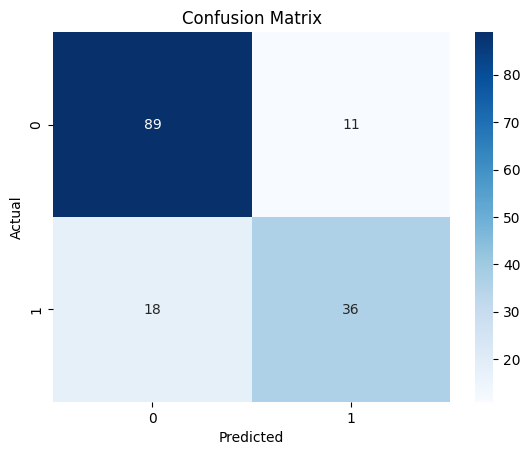

In [27]:
conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues') # Use fmt='d' for integer annotations
plt.title('Confusion Matrix') # Add title for clarity
plt.show() # Display the plot